# 1. Import Dependencies

In [298]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check the coordinates

In [269]:
df_bench = pd.read_csv('./labeling/benchpress_coords.csv')
df_dead = pd.read_csv('./labeling/deadlift_coords.csv')
df_squat = pd.read_csv('./labeling/squat_coords.csv')

In [270]:
df_bench.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct_down,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775


In [271]:
df_dead.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092


In [272]:
df_squat.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,-0.313403,0.976089,0.302474,0.597096,0.656582,0.806852,0.332788,0.694722,-0.373114,0.985341
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,-0.305247,0.975016,0.359256,0.611075,0.285869,0.773935,0.334483,0.695383,-0.373157,0.984979
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,-0.462458,0.976983,0.493459,0.641891,0.653005,0.840647,0.369003,0.695396,-0.618573,0.986593
3,s_spine_neutral_up,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,-0.401422,0.968094,0.488726,0.641720,0.591863,0.822999,0.332679,0.700715,-0.569745,0.981765
4,s_spine_neutral_down,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,-0.601359,0.977251,0.393079,0.617481,0.678957,0.802303,0.347247,0.690384,-0.761584,0.985078


# 3. Data Preprocessing & Data Normalization

In [273]:

# 데이터 로드
bench_data = np.loadtxt("./labeling/benchpress_coords.csv", delimiter=",", dtype=str, skiprows=1)
labels = bench_data[:, 0]
bench_data = bench_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# 결측값 처리
bench_data = np.nan_to_num(bench_data)

bench_data = bench_data.astype(float)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(bench_data, labels, test_size=0.25)

# 텐서 변환
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

# float 변환
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()

# 4. Construct Deep Learning Model

In [274]:
y_test.shape

torch.Size([239, 6])

In [275]:
y_train.shape

torch.Size([716, 6])

In [276]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [277]:
# 모델 생성
input_size = 132
output_size = 6
model = DeepClassifier(input_size, output_size)

In [278]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

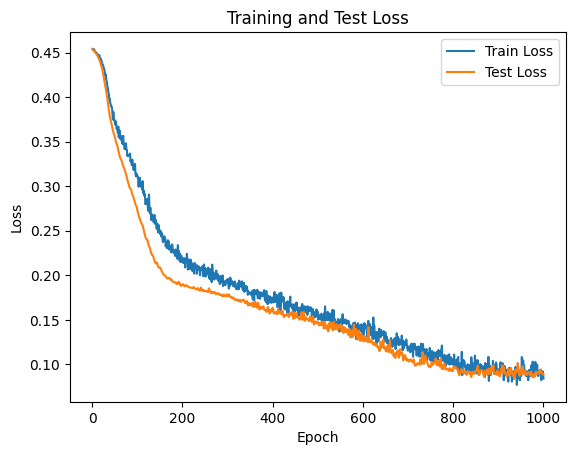

In [279]:
train_losses = []
test_losses = []

epochs = 1000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [280]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.08837868273258209


In [281]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = X_test[sample_index]  # 입력 데이터
    target_sample = y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    model.eval()
    with torch.no_grad():
        prediction = model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 0.4973,  0.3717,  0.6778,  1.0000,  0.5091,  0.3689,  0.7198,  1.0000,
         0.5171,  0.3702,  0.7199,  1.0000,  0.5252,  0.3717,  0.7194,  1.0000,
         0.4902,  0.3693,  0.7243,  1.0000,  0.4844,  0.3706,  0.7243,  1.0000,
         0.4785,  0.3720,  0.7243,  1.0000,  0.5374,  0.3820,  0.7517,  1.0000,
         0.4723,  0.3817,  0.7752,  1.0000,  0.5123,  0.3811,  0.6761,  0.9999,
         0.4864,  0.3817,  0.6807,  1.0000,  0.6060,  0.4246,  0.6027,  0.9999,
         0.4035,  0.4305,  0.6437,  1.0000,  0.7003,  0.4732,  0.5267,  0.9509,
         0.3021,  0.4856,  0.4983,  0.9941,  0.7586,  0.4231,  0.3262,  0.9744,
         0.2564,  0.4240,  0.2366,  0.9980,  0.7725,  0.4107,  0.3305,  0.9443,
         0.2479,  0.4096,  0.2173,  0.9939,  0.7596,  0.4057,  0.3127,  0.9350,
         0.2603,  0.4050,  0.2343,  0.9913,  0.7530,  0.4097,  0.3158,  0.9439,
         0.2662,  0.4087,  0.2380,  0.9916,  0.5940,  0.5184, -0.0053,  1.0000,
         0.4273,  0.5303, 

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_11625/2518169948.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [295]:
import numpy as np

model.eval()
with torch.no_grad():
    predicted_probs = model(X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")


정확도: 0.858
정밀도: 0.981
재현율: 0.858
F1 점수: 0.915


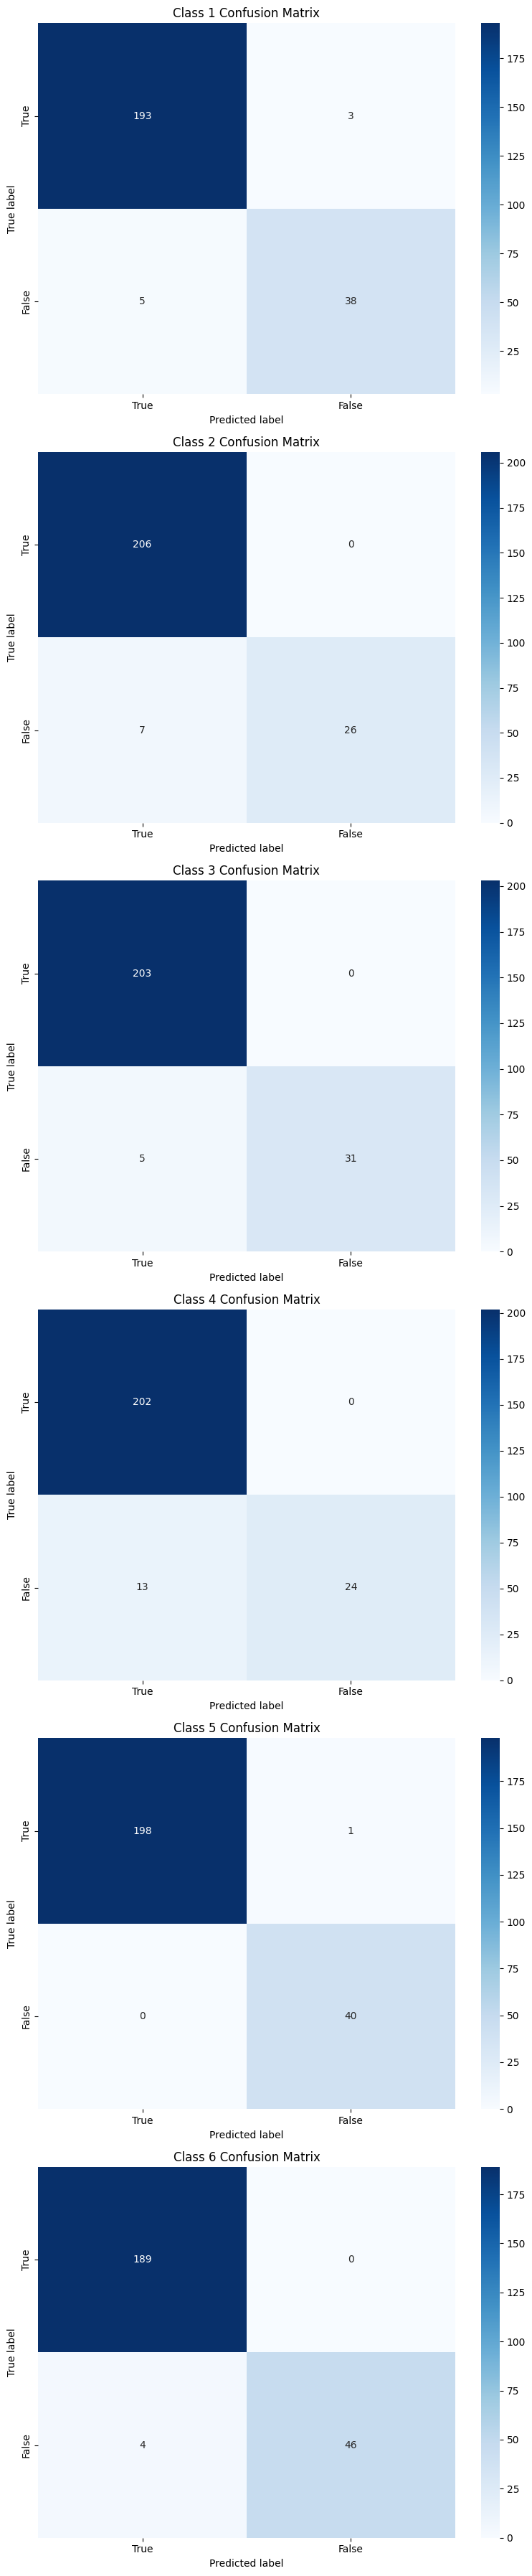

In [297]:
confusion_matrix = multilabel_confusion_matrix(y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)